# Roadmark Dataset에서 필요한 클래스만 남기고, 삭제하는 코드
- 탐지하고자 하는 category_id:
    - 402: 속도제한 어린이 보호 구역
    - 403: 어린이 보호 구역
    - 426: 자전거 전용 도로
    - 412: 횡단보도
    - 432: 정차금지지대
    - 389: 주차금지
    - 391: 정차주차금지516-2

In [1]:
import pandas as pd
import numpy as np
import os
import json
import pprint
import shutil

## 0) 기본 경로 지정하기

In [2]:
label_src_path = '/Users/myoungjikim/Downloads/087_도로_로드마크_인식을_위한_주행_영상_데이터/01_데이터/1_Training/라벨링데이터/2D_JSON'
image_src_path = '/Users/myoungjikim/Downloads/087_도로_로드마크_인식을_위한_주행_영상_데이터/01_데이터/1_Training/원천데이터/TS7_02_비온전(물리)1/IMAGE'

## 1) 데이터 형태 파악하기

In [3]:

def get_json_data(file_path):
    with open(file_path) as json_data:
        result = json.load(json_data)
    return result

filenames = os.listdir(label_src_path)
file_path = os.path.join(label_src_path, filenames[1])
json_data = get_json_data(file_path=file_path)
# pprint.pprint([data['category_id'] for data in json_data['annotations']])
pprint.pprint(json_data)

{'annotations': [{'category_id': 381,
                  'id': '0001421153',
                  'image_id': '0000098570',
                  'polyline': [[4.3850794016887675e-14,
                                954.579150284161,
                                141.90356452670267,
                                904.9962060473649,
                                245.46560560009152,
                                870.4980822349336,
                                363.4391928422691,
                                830.3060933272465,
                                586.5061036256747,
                                755.1356625000329,
                                785.1124324247022,
                                681.7484327231965]]},
                 {'category_id': 381,
                  'id': '0001421154',
                  'image_id': '0000098570',
                  'polyline': [[1.542862653080904,
                                978.7900388404584,
                                99.27

## 1-2) 데이터 크기 파악하기

In [4]:
def get_directory_size(directory):
    total_size = 0
    # 디렉토리 내 모든 파일의 크기 합산
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            # 파일의 크기를 더함
            total_size += os.path.getsize(file_path)
    return total_size

original_label_data_size = get_directory_size(label_src_path)/1024**3
original_image_data_size = get_directory_size(image_src_path)/1024**3
print( 'label_src_path size: ', original_label_data_size,'GB' )
print( 'image_src_path size: ', original_image_data_size,'GB' )

label_src_path size:  0.11301449127495289 GB
image_src_path size:  56.49294500146061 GB


## 2) 데이터 삭제하기

In [5]:
# 탐지하고자 하는 category_id 리스트
code_to_detect = [402, 403, 426, 412, 432, 389, 390]

In [21]:
def filter_annotations(data, categories):

    filtered_annotations = []
    
    for annotation in data['annotations']:
        if annotation['category_id'] in categories:
            filtered_annotations.append(annotation)
    
    filtered_id = [ annotation['category_id'] for annotation in filtered_annotations]
    print(filtered_id)

    return filtered_annotations
    # return [annotation for annotation in data['annotations'] if annotation['category_id'] in categories]

def delete_file(json_file_path, image_file_path):
    try:
        # os.remove(json_file_path)
        print(f"{json_file_path}파일이 삭제됨")
        # os.remove(image_file_path)
        print(f"{image_file_path}파일이 삭제됨")
    except FileNotFoundError:
        print(f"파일이 존재하지 않습니다.")
    except PermissionError:
        print(f"파일을 삭제할 권한이 없습니다.")

def update_label_file(json_file_path, data):
    try:
        with open(json_file_path, 'w') as json_data:
            json.dump(data, json_data)
    except FileNotFoundError:
        print(f"파일이 존재하지 않습니다.")
    except PermissionError:
        print(f"파일을 쓸 권한이 없습니다.")
    
def process_files(filenames, label_src_path, image_src_path, categories):
    image_paths = []
    for filename in filenames:
        json_file_path = os.path.join(label_src_path, filename)
        
        # JSON 파일 열기
        with open(json_file_path, 'r') as json_data:
            data = json.load(json_data)
        
        # 탐지하고자 하는 category_id가 아닌 annotation 제거하기
        data['annotations'] = filter_annotations(data, categories)

        # 유효한 annotation이 있는 경우에만 JSON 파일 저장 및 이미지 복사
        if data['annotations']:
            print(f'{filename}: 탐지하고자 하는 카테고리가 있습니다.')
            # update_label_file(json_file_path,data)
            image_file_path = os.path.join(image_src_path, data['images'][0]['filename'])
            delete_file(json_file_path, image_file_path)
            image_paths.append(image_file_path)
    return image_paths

            

def main():
    filenames = os.listdir(label_src_path)  # JSON 파일 리스트
    filenames = [filename for filename in filenames if filename.endswith('.json')]

    result = process_files(filenames, label_src_path, image_src_path, code_to_detect)
    print(result)

if __name__ == "__main__":
    main()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [32]:
path = '/Users/myoungjikim/Downloads/087_도로_로드마크_인식을_위한_주행_영상_데이터/01_데이터/1_Training/라벨링데이터/2D_JSON/0202_light_clear_smooth_01000000.json'
filenames = os.listdir(label_src_path)
print('filename', filenames[0])
file_path = os.path.join(label_src_path, filenames[0])
print('file_path', file_path)
with open(file_path,'r') as f:
    # data = json.load(f)
    data = f.read()
    print(data)

filename 0202_light_clear_smooth_03000464.json
file_path /Users/myoungjikim/Downloads/087_도로_로드마크_인식을_위한_주행_영상_데이터/01_데이터/1_Training/라벨링데이터/2D_JSON/0202_light_clear_smooth_03000464.json



## 3) 삭제 전후 파일 크기 비교

In [62]:
print( 'label_src_path size: ', original_label_data_size,'GB' )
print( 'image_src_path size: ', original_image_data_size,'GB' )
print('\n')
print( 'label_src_path size: ', get_directory_size(label_src_path)/1024**3,'GB' )
print( 'image_src_path size: ', get_directory_size(image_src_path)/1024**3,'GB' )

label_src_path size:  0.08997869677841663 GB
image_src_path size:  44.66797006782144 GB


label_src_path size:  0.08997869677841663 GB
image_src_path size:  44.66797006782144 GB


## 4) 바운딩 박스, 폴리라인 보기

In [63]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from PIL import Image

# Jupyter Notebook에서 이미지를 인라인으로 표시
%matplotlib inline

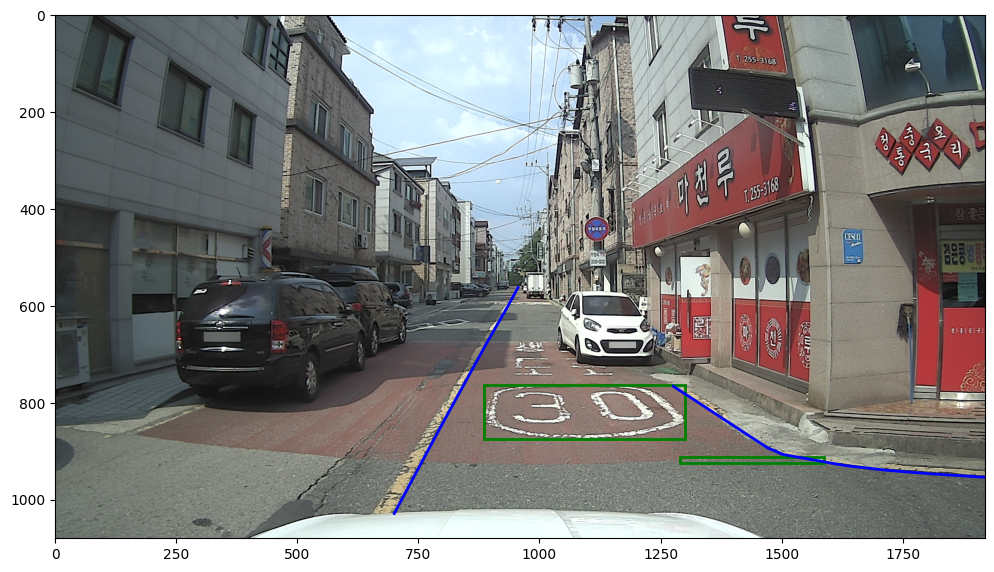

[381, 381, 383, 383, 390, 396]


In [65]:
def draw_annotations(image, annotations):
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image)

    for annotation in annotations:
        if 'bbox' in annotation:
            # 바운딩 박스 그리기
            x, y, w, h = annotation['bbox']
            rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none')
            ax.add_patch(rect)
        if 'polyline' in annotation:
            # 폴리라인 그리기
            points = annotation['polyline']
            # Reshape 1D polyline array into pairs of (x, y) coordinates
            points = np.array(points).reshape(-1, 2)
            polyline = Line2D(points[:, 0], points[:, 1], linewidth=2, color='b')
            ax.add_line(polyline)
    
    return fig, ax

def process_json_file(json_file_path, image_src_path):
    with open(json_file_path, 'r') as f:
        data = json.load(f)

    # 이미지 파일 이름 얻기 
    image_filename = data['images'][0]['filename']
    image_path = os.path.join(image_src_path, image_filename)
    

    # 이미지 읽기
    image = Image.open(image_path)
    
    # 어노테이션 그리기
    fig, ax = draw_annotations(np.array(image), data['annotations'])

    # Jupyter Notebook에서 이미지를 인라인으로 표시
    plt.show()

def main():
    label_filenames = os.listdir(label_src_path)
    #                                            label_filenames[여기바꿔서] 이미지변경 가능
    json_file_path = os.path.join(label_src_path,label_filenames[21])  # JSON 파일 경로 

    process_json_file(json_file_path, image_src_path)
    pprint.pprint([data['category_id'] for data in json_data['annotations']])

if __name__ == "__main__":
    main()


In [ ]:
# Roadmark Dataset에서 필요한 클래스만 남기고, 삭제하는 코드
- 탐지하고자 하는 category_id:
    - 402: 속도제한 어린이 보호 구역
    - 403: 어린이 보호 구역
    - 426: 자전거 전용 도로
    - 412: 횡단보도
    - 432: 정차금지지대
    - 389: 주차금지
    - 390: 정차주차금지516